In [44]:
import numpy as np
import os
import tifffile as ti
import cv2
import random
import torch 
import skimage
import matplotlib.pyplot as plt
import matplotlib

from pymoo.core.problem import ElementwiseProblem
from skimage.metrics import structural_similarity as ssim
import skimage.measure    

matplotlib.rcParams['figure.figsize'] = [13, 13]

img_dir = "/mnt/external.data/TowbinLab/kstojanovski/20211206_Ti2_10x_wBT264_186_daf-16d_25C_20211206_170249_693/analysis/ch2/"

images = [os.path.join(img_dir, x) for x in os.listdir(img_dir)]

# test_images = random.sample(images, 20)
test_images = random.sample(images, 5)

In [45]:
def cost_function(inputs):
    image, clahe = inputs
    img = ti.imread(image)
    improved_img = clahe.apply(img)

    plt.imshow(img)
    plt.show()
    plt.imshow(improved_img)
    plt.show()
    # entropy = skimage.measure.shannon_entropy(improved_img)
    # struct_similarity = ssim(img, improved_img)
    # # return None

    # return [entropy, struct_similarity]

def cost_function_with_global(image):
    global clahe

    img = ti.imread(image)
    improved_img = clahe.apply(img)
    entropy = skimage.measure.shannon_entropy(improved_img)
    old_entropy = skimage.measure.shannon_entropy(img)
    struct_similarity = ssim(img, improved_img)
    # return None

    # return [entropy, struct_similarity]
    return [old_entropy, entropy]
def cost_function_list(list_imgs):
    clahe = clahe = cv2.createCLAHE(clipLimit=25, tileGridSize=(4,4))
    res = []
    for img in list_imgs:
        res.append(cost_function((img, clahe)))

    # print("done")

# def parallel_cost_function(list_imgs):
#     global clahe
#     clahe = cv2.createCLAHE(clipLimit=0.5, tileGridSize=(8,8))
#     with mp.Pool(64) as pool:
#         res = pool.map(cost_function_with_global, list_imgs)
#     print("done")

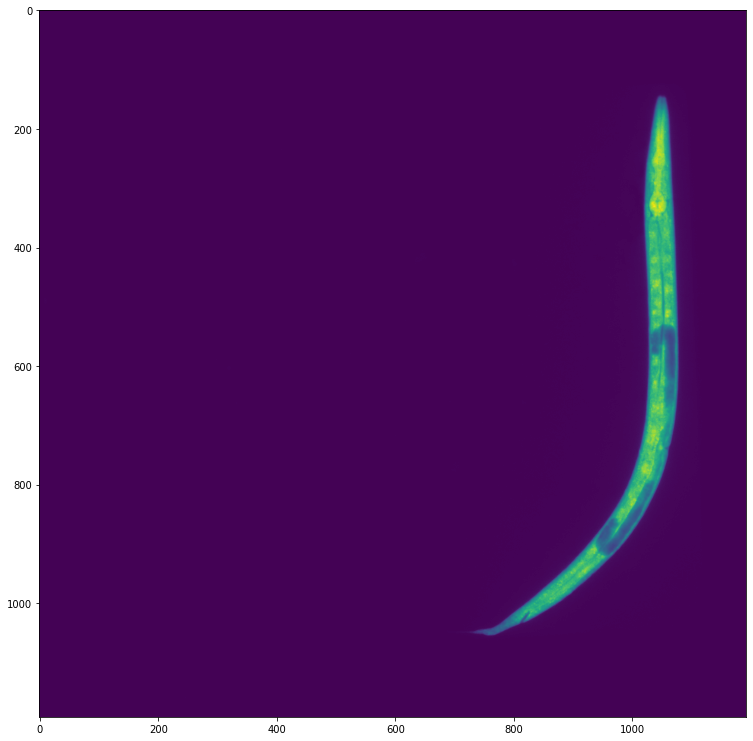

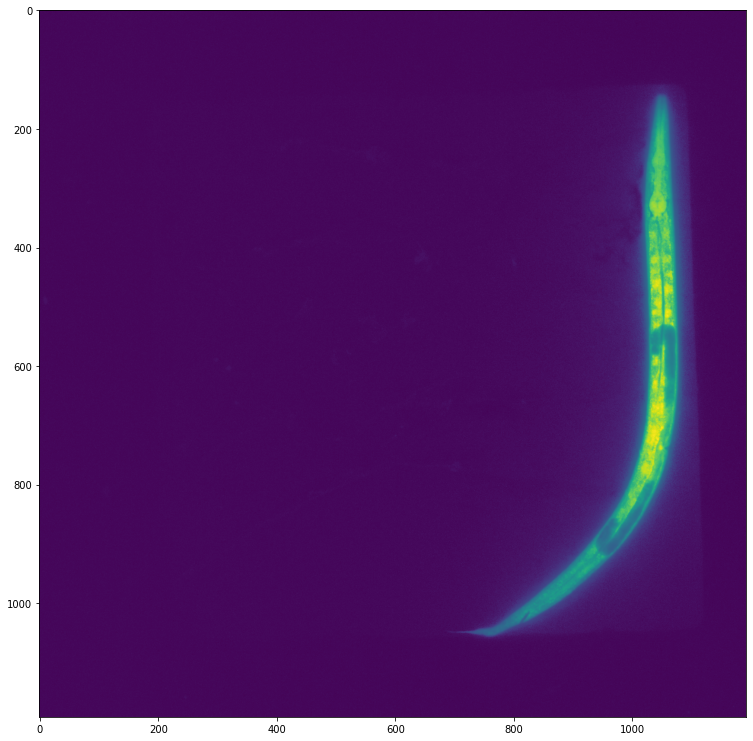

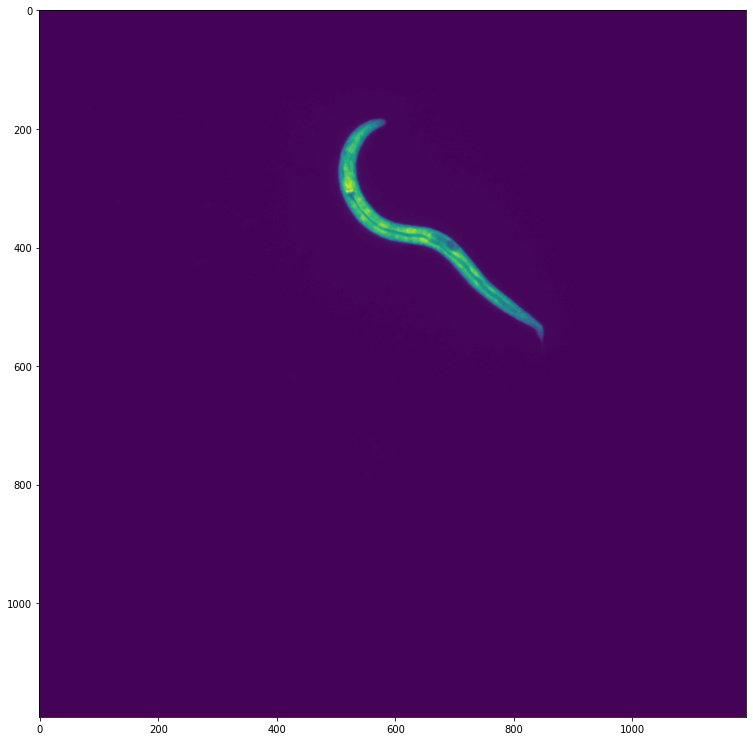

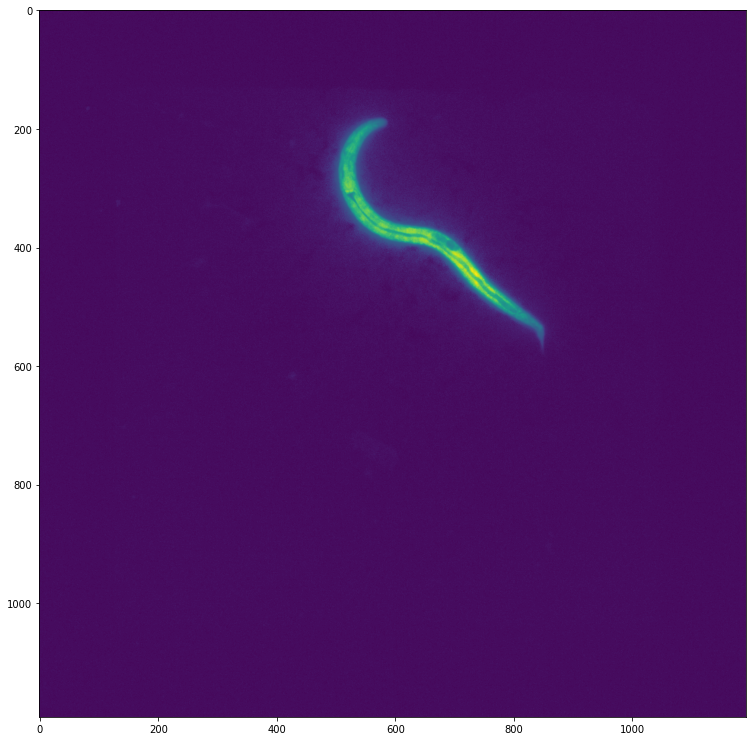

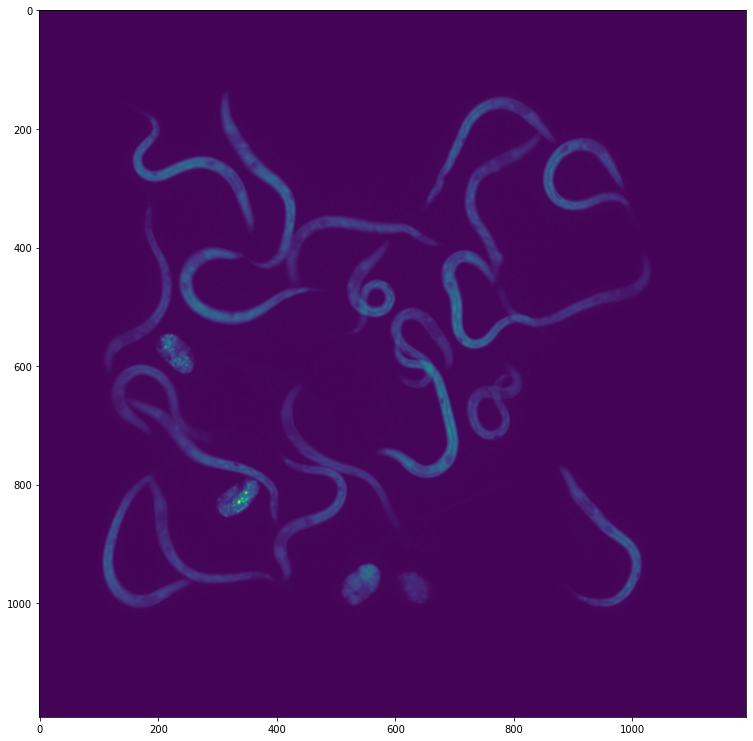

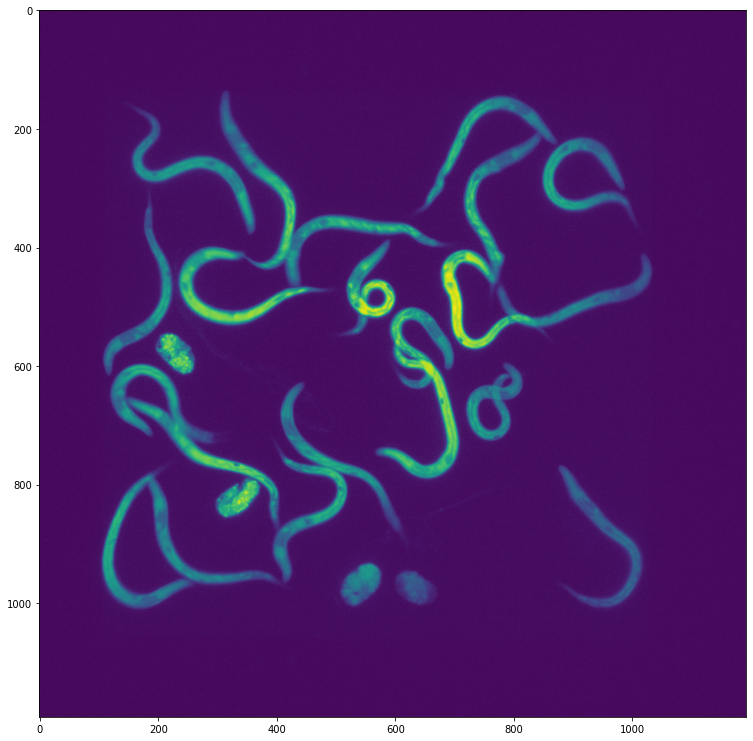

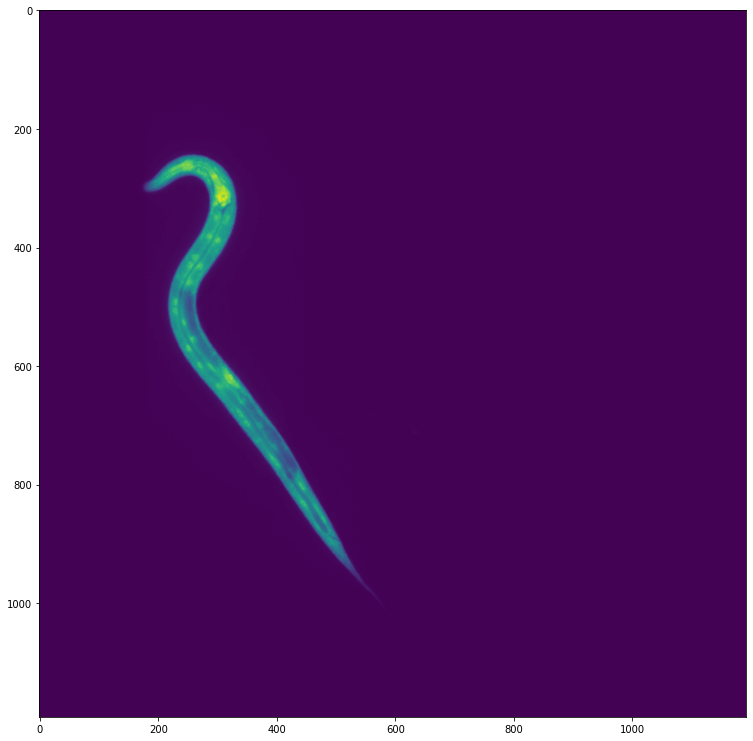

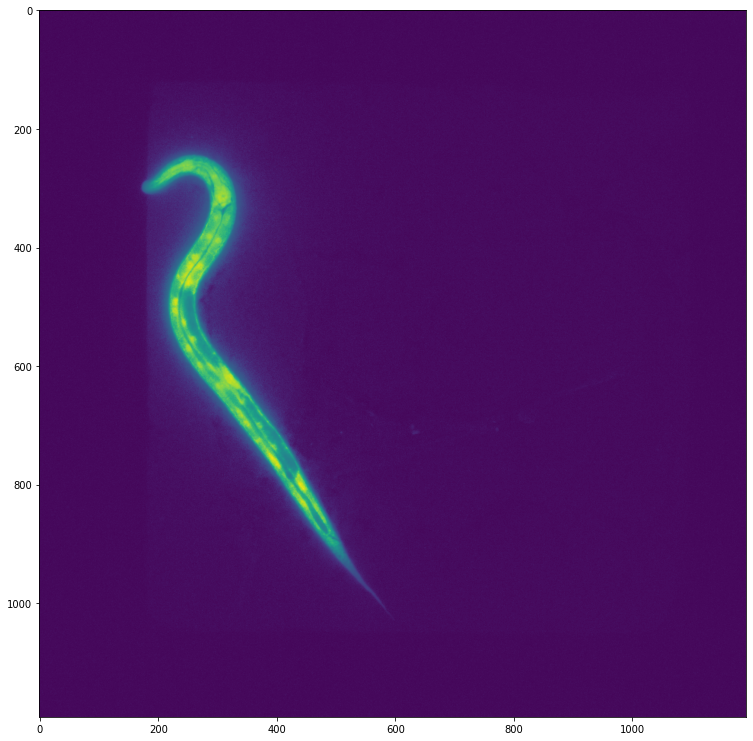

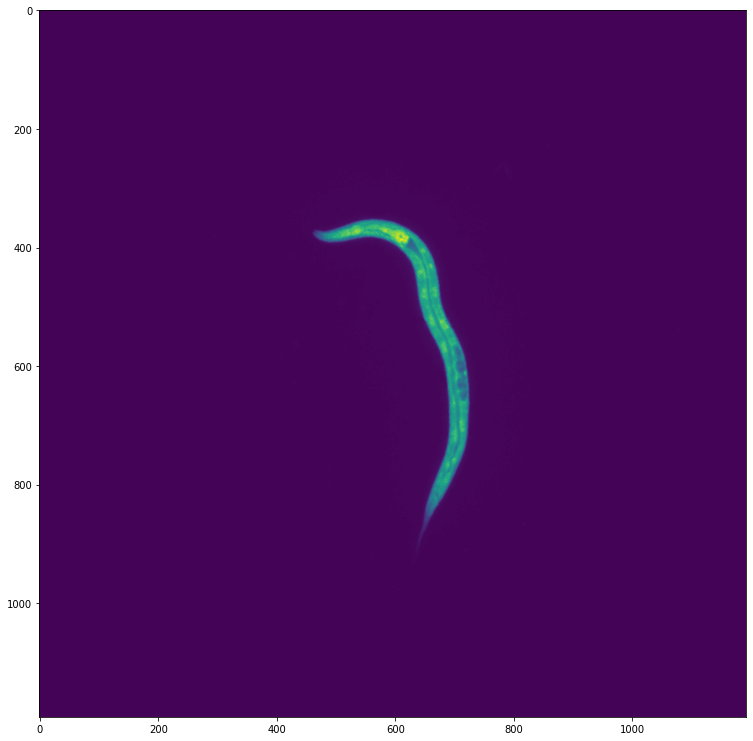

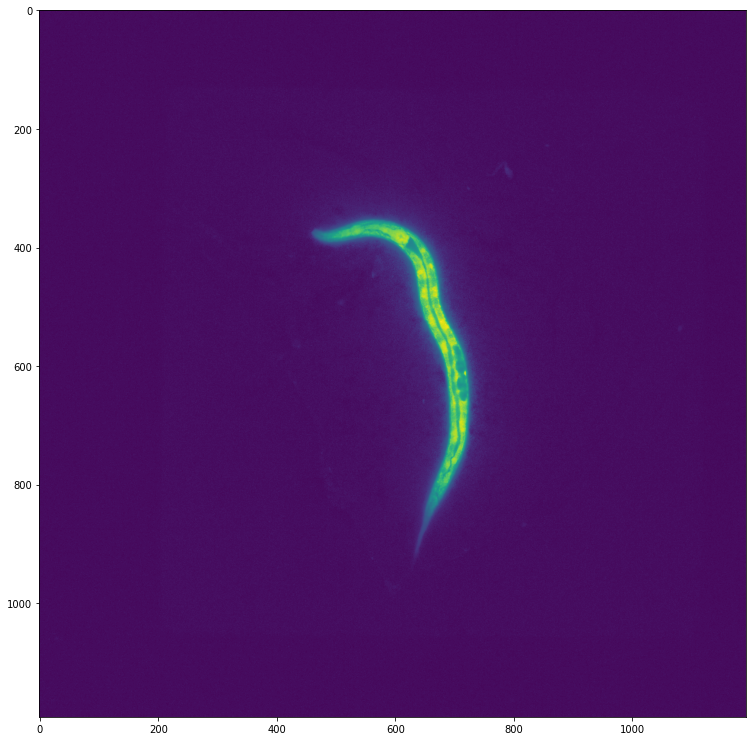

In [46]:
cost_function_list(test_images)

In [47]:
# %%timeit -r2 -n5
# parallel_cost_function(test_images)

In [48]:
# start_time = time.process_time()
# dim = 1184
# for image in test_images:
#     img = ti.imread(image)
#     img = np.expand_dims(img, 0)
#     improved_img = np.empty_like(img, dtype="float64")
#     improved_img[0, :, :] = equalize_adapthist(img[0, :, :], nbins=np.max(
#         img[0, :, :]) - 1, clip_limit=0.0004, kernel_size=int(img[0, :, :].shape[0]/16))

#     # Resize the image
#     scale_x = dim/img.shape[1]
#     scale_y = dim/img.shape[2]
#     processed_img = ndi.zoom(improved_img, zoom=[1, scale_x, scale_y])

#     processed_img = processed_img.transpose(
#         (0, 1, 2)).astype('float64')

# # get the end time
# et = time.process_time()

# # get execution time
# res = et - start_time
# print('CPU Execution time:', res, 'seconds')